In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime

stock = input("Enter a stock Name: ")

start_date = datetime(2018, 1, 1)
end_date = datetime.now()
#end_date = datetime(2023, 11, 30)

df = yf.download(stock, start=start_date, end=end_date)

Enter a stock Name: AMZN
[*********************100%***********************]  1 of 1 completed


In [2]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-12,145.520004,147.500000,145.300003,147.479996,147.479996,44944300
2023-12-13,148.119995,149.460007,146.820007,148.839996,148.839996,52766200
2023-12-14,149.929993,150.539993,145.520004,147.419998,147.419998,58400800
2023-12-15,148.380005,150.570007,147.880005,149.970001,149.970001,110039100
2023-12-18,150.559998,154.850006,150.050003,154.070007,154.070007,62466100


In [4]:
df1=df.reset_index()['Close']

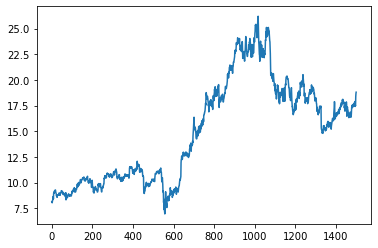

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [6]:
df1

0        8.145000
1        8.075000
2        8.025000
3        8.175000
4        8.240000
          ...    
1496    17.549999
1497    17.469999
1498    18.370001
1499    18.670000
1500    18.799999
Name: Close, Length: 1501, dtype: float64

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))      #here we transform the scaler value into 0,1
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
print(df1)

[[0.06256492]
 [0.05893041]
 [0.05633435]
 ...
 [0.59345796]
 [0.60903425]
 [0.61578394]]


In [9]:
##splitting dataset into train and test split
#In timeseries data , next data is always depend on previous data
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(975, 526)

In [11]:
import numpy
# convert an array of values into a dataset matrix
#timestep value show the output is depend how many independent fearure ,
#using this we convert training data into independent and dependent feature
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape), print(y_train.shape)

(874, 100)
(874,)


(None, None)

In [14]:
print(X_test.shape), print(ytest.shape)

(425, 100)
(425,)


(None, None)

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))  #input layer 
model.add(LSTM(50,return_sequences=True))                    
model.add(LSTM(50))
model.add(Dense(1))                                            #output layer
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 25s 645ms/step - loss: 0.0406 - val_loss: 0.0205
Epoch 2/100
14/14 [==============================] - 5s 364ms/step - loss: 0.0082 - val_loss: 0.0068
Epoch 3/100
14/14 [==============================] - 5s 355ms/step - loss: 0.0022 - val_loss: 0.0076
Epoch 4/100
14/14 [==============================] - 5s 343ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 5/100
14/14 [==============================] - 5s 357ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 6/100
14/14 [==============================] - 5s 361ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 7/100
14/14 [==============================] - 5s 379ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 8/100
14/14 [==============================] - 5s 376ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 9/100
14/14 [==============================] - 5s 389ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 10/100
14/14 [==============================] - 5s 337ms/step - loss: 0.0011 - val_l

In [19]:
import tensorflow as tf

In [20]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

14/14 [==============================] - 1s 67ms/step


In [21]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

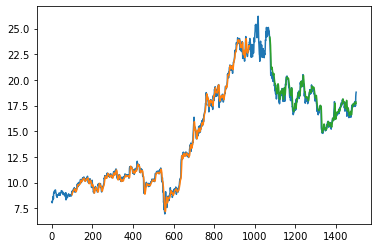

In [22]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
len(test_data)

526

In [24]:
x_input=test_data[426:].reshape(1,-1)
x_input.shape

(1, 100)

In [25]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [26]:
# demonstrate prediction for next 1 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<1):
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        yhat = scaler.inverse_transform(yhat)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[18.637661]
[[18.63766098022461]]


In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

13.573913006237817

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

17.499356306038475